In [1]:
import xgboost as xgb
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

### High-dimensional structured data with small amount of informative features

In [10]:
scores_dict = {
    "XGBoost":[],
    "Neural Network":[]
}
times_dict = {
    "XGBoost":[],
    "Neural Network":[]
}
for seed in range(10):
    # Synthetic dataset
    X, y = make_classification(n_samples=1000, n_features=200, n_informative=15, n_redundant=15, random_state=seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

    # Classifiers to compare
    nn = MLPClassifier(random_state=seed)
    xgboost = xgb.XGBClassifier(random_state=seed)

    classifiers = [
        ("XGBoost", xgboost),
        ("Neural Network",nn)]

    # Fitting and scoring the classifiers
    for name, clf in classifiers:
        t0 = time.time()
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores_dict[name].append(score)
        t1 = time.time()
        times_dict[name].append(t1-t0)

In [11]:
for name, scores in scores_dict.items():
    print(name)
    print(sum(scores)/len(scores))

XGBoost
0.8647499999999999
Neural Network
0.76325


In [12]:
for name, times in times_dict.items():
    print(name)
    print(sum(times)/len(times))

XGBoost
0.33393034934997556
Neural Network
0.3368947505950928


In [13]:
xgb_arr = np.array(scores_dict["XGBoost"])
nn_arr = np.array(scores_dict["Neural Network"])

print(int(np.sum(xgb_arr>nn_arr)))

10


### Dataset with small number of samples

In [170]:
scores_dict = {
    "SVM":[],
    "Gaussian Process":[],
    "Neural Network":[]
}
for seed in range(100):
    # Synthetic dataset
    X, y = make_moons(n_samples=1000 ,noise=0.9, random_state=seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=seed)
    
    # Classifiers to compare
    svm = SVC(random_state=seed)
    gp = GaussianProcessClassifier(random_state=seed)
    nn = MLPClassifier(max_iter=10000,random_state=seed)
    
    classifiers = [
        ("SVM", svm),
        ("Gaussian Process", gp),
        ("Neural Network",nn)]

    # Fitting and scoring the classifiers
    last_models = []
    for name, clf in classifiers:
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores_dict[name].append(score)
        last_models.append((name,clf))

In [171]:
for name, scores in scores_dict.items():
    print(name)
    print(sum(scores)/len(scores))

SVM
0.688778947368421
Gaussian Process
0.6964105263157895
Neural Network
0.6592210526315789


In [172]:
svm_arr = np.array(scores_dict["SVM"])
gp_arr = np.array(scores_dict["Gaussian Process"])
nn_arr = np.array(scores_dict["Neural Network"])

print(int(np.sum(svm_arr>nn_arr)))
print(int(np.sum(gp_arr>nn_arr)))

83
93


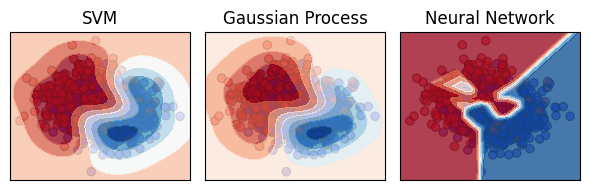

In [192]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

figure = plt.figure(figsize=(6, 2))
for i, (name, model) in enumerate(last_models):
    ax = plt.subplot(1,3,i+1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    cm = plt.cm.RdBu
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    DecisionBoundaryDisplay.from_estimator(
                model, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )
    ax.set_title(name)
plt.tight_layout()    
plt.savefig("small_data.png", transparent=True)
plt.show()
plt.close()